In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Project is about predicting insurance charges using independent variable (age, sex, bmi, number of children, smoking, region) <br>

<b> Data description </b>

Age is a real number<br>
Sex binary varibale male and female <br>
bmi (body mass index) is a real number <br>
children is number of children a person has <br>
smoker is a binary variable <br>
region is class variable <br>
charges is dependent varibale (y) <br>

<b> 1st part is Data visualization part where relationships between independent and dependent variable is shown </b><br>
<b> 2nd part is data transformation: The way to handle skewed data </b><br>
<b> 3rd part is a difference between R square and Adjusted R square </b><br>
<b> 4th part is Modeling </b><br>
<b> 5th part is Check which for polynomial regression and fitting with right polynomial degree</b><br>

In [2]:
df = pd.read_csv('D:/100_days_ml/DATA/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Checking NA values

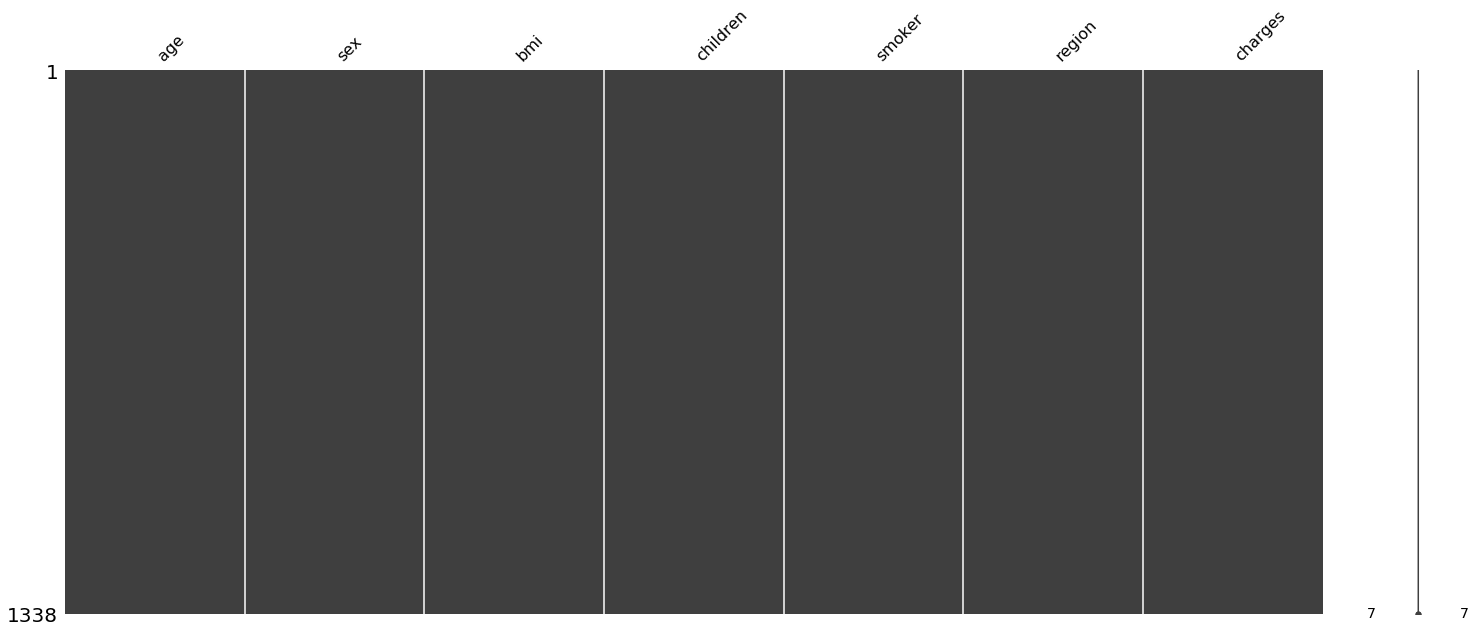

In [4]:
msno.matrix(df) 

check for na values, No NA values.

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


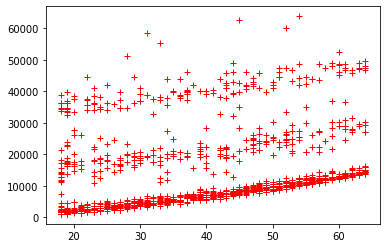

In [7]:
plt.plot(df.age,df.charges,'r+')

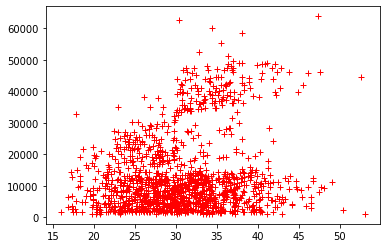

In [8]:
plt.plot(df.bmi,df.charges,'r+')

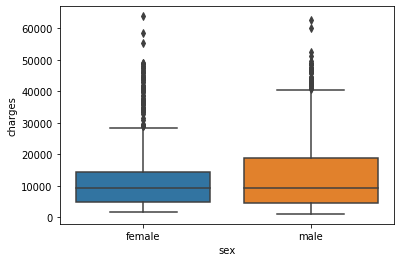

In [9]:
ax = sns.boxplot(x="sex", y="charges", data=df)

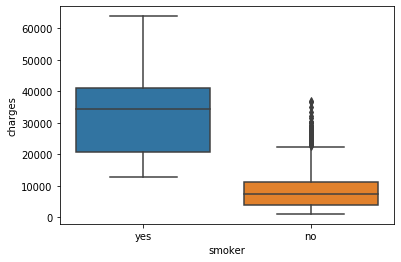

In [10]:
ax = sns.boxplot(x="smoker", y="charges", data=df)

Smoker pays more insurance charges

C:\Users\mayan\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(-8.699999999999996, 0.5, 'Charge')

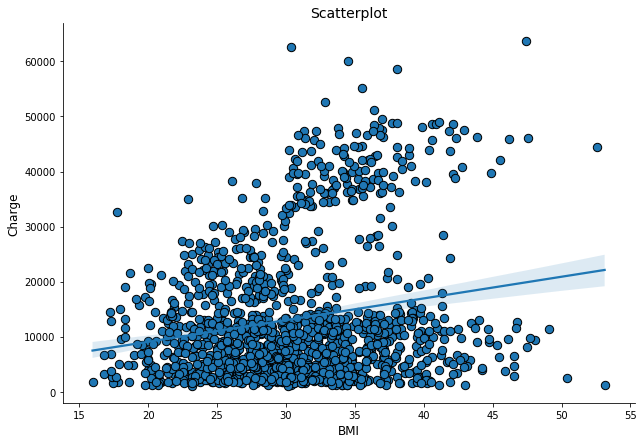

In [11]:
sns.lmplot(x = 'bmi',y='charges',data=df,size=6,aspect=1.5,
           scatter_kws={"s": 70, "alpha": 1,'edgecolor':'black'},legend=False,fit_reg=True)

plt.title('Scatterplot',fontsize=14)
plt.xlabel('BMI',fontsize=12)
plt.ylabel('Charge',fontsize=12)

There is positive but weak correlation between BMI and charges

C:\Users\mayan\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


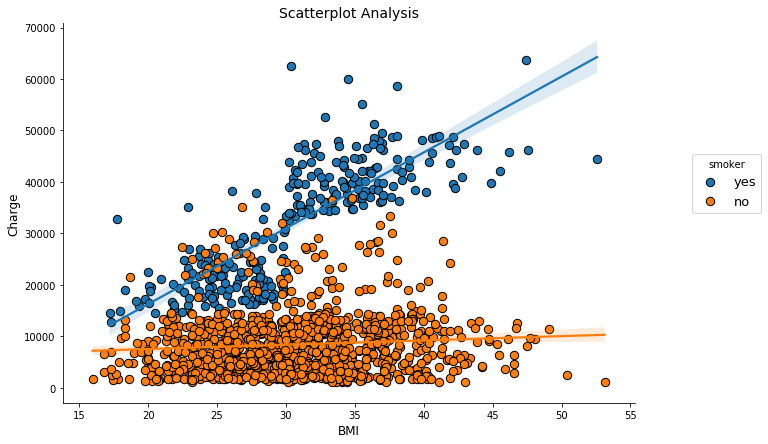

In [12]:
sns.lmplot(x = 'bmi',y='charges',hue='smoker',data=df,size=6,aspect=1.5,
           scatter_kws={"s": 70, "alpha": 1,'edgecolor':'black'},legend=False,fit_reg=True)

plt.title('Scatterplot Analysis',fontsize=14)
plt.xlabel('BMI',fontsize=12)
plt.ylabel('Charge',fontsize=12)
plt.legend(loc=[1.1,0.5],title = 'smoker', fontsize=13)

Scatter plot shows for smoker correlation is positive and strong so thet pay more for insurance then non smokers regardless of same BMI

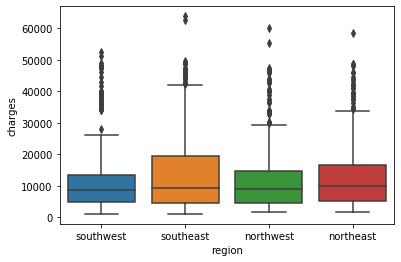

In [13]:
ax = sns.boxplot(x="region", y="charges", data=df)

In [14]:
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 27), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 27) & (col['age'] <= 39), 'age_cat'] = 'Adult'
    col.loc[(col['age'] > 39) & (col['age'] <= 51), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 51, 'age_cat'] = 'Elder'

In [15]:
cat_age = df.age_cat.value_counts()

In [16]:
x = list(cat_age.index)

In [17]:
y = list(cat_age.values)

<BarContainer object of 4 artists>

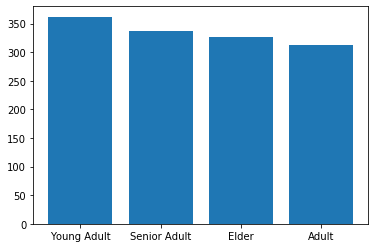

In [18]:
plt.bar(x,y)

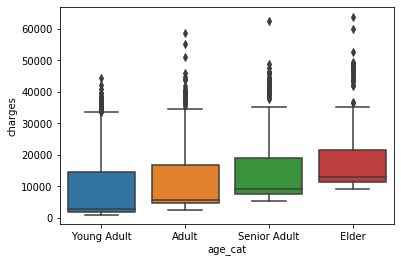

In [19]:
ax = sns.boxplot(x="age_cat", y="charges", data=df)

https://www.calculator.net/bmi-calculator.html

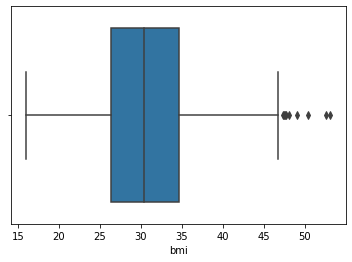

In [20]:
ax = sns.boxplot(x="bmi", data=df)

In [21]:
df['bmi_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['bmi'] < 16, 'bmi_cat'] = 'Severe T'
    col.loc[(col['bmi'] >= 16) & (col['bmi'] <= 17), 'bmi_cat']  = 'Moderate T'
    col.loc[(col['bmi'] > 17) & (col['bmi'] <= 18.5), 'bmi_cat'] = 'Mild T'
    col.loc[(col['bmi'] > 18.5) & (col['bmi'] <= 25), 'bmi_cat'] = 'N'
    col.loc[(col['bmi'] > 25) & (col['bmi'] <= 30), 'bmi_cat']   = 'O.W.'
    col.loc[(col['bmi'] > 30) & (col['bmi'] <= 35), 'bmi_cat']   = 'ObeseI'
    col.loc[(col['bmi'] > 35) & (col['bmi'] <= 40), 'bmi_cat']   = 'ObeseII'
    col.loc[col['bmi'] > 40, 'bmi_cat'] = 'ObeseIII'

In [22]:
cat_bmi = df.bmi_cat.value_counts()
cat_bmi

ObeseI        389
O.W.          386
N             226
ObeseII       225
ObeseIII       91
Mild T         18
Moderate T      2
Severe T        1
Name: bmi_cat, dtype: int64

<BarContainer object of 8 artists>

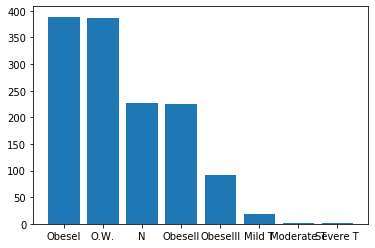

In [23]:
x = list(cat_bmi.index)
y = y = list(cat_bmi.values)
plt.bar(x,y)

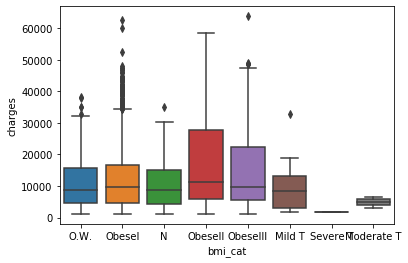

In [24]:
ax = sns.boxplot(x="bmi_cat", y="charges", data=df)

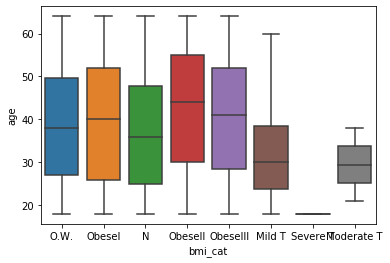

In [25]:
ax = sns.boxplot(x="bmi_cat", y="age", data=df)

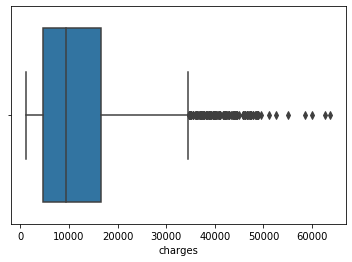

In [26]:
ax = sns.boxplot(x="charges",  data=df)

outliers

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

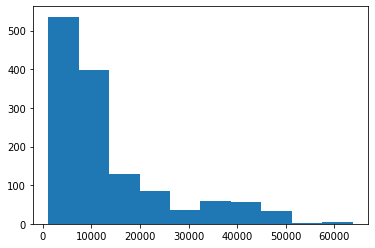

In [27]:
plt.hist(df.charges)

right skewed data

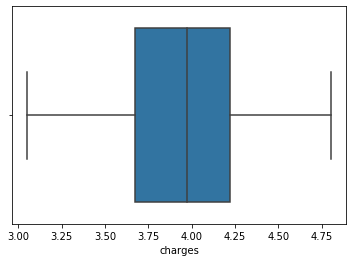

In [28]:
ax = sns.boxplot(x = np.log10(df.charges))

Log transformation

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([3.04994404, 3.22541157, 3.4008791 , 3.57634663, 3.75181416,
        3.92728169, 4.10274922, 4.27821675, 4.45368427, 4.6291518 ,
        4.80461933]),
 <a list of 10 Patch objects>)

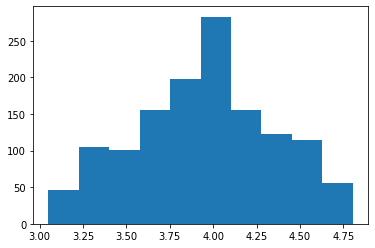

In [29]:
plt.hist(np.log10(df.charges))

Log transformation Normalize the data and handles outlier values

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,O.W.
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,ObeseI
2,28,male,33.000,3,no,southeast,4449.46200,Adult,ObeseI
3,33,male,22.705,0,no,northwest,21984.47061,Adult,N
4,32,male,28.880,0,no,northwest,3866.85520,Adult,O.W.


In [31]:
y = df.charges

In [32]:
df  = df.drop(['bmi_cat'], axis=1)
df  = df.drop(['age_cat'], axis=1)

In [33]:
df_oh = pd.get_dummies(df)

In [34]:
df_oh.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [35]:
X = df_oh.drop(['charges'], axis=1)

In [36]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [37]:
X.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [38]:
X.shape

(1338, 11)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# log transformation 
y_train = np.log10(y_train)

# Before Modeling

# R square v/s Adjsuted R square

Let’s consider we have simple linear regression with one independent variable (X1) and one dependent variable (y). R2 is one way to check model performance. R2 shows the variability in (y) explained by (X1). In simple words if R2 is 0.85 so with X1 85% of variation is explained in (y). <br>

<b>Problem with R square </b> <br>
•	Now let’s say we add one more independent variable (X2), R2 will increase even though there is no relationship between independent variable (X2) and dependent variable (y) to solve this problem there is something called Adjusted R2.
Adjusted R Square <br>

•	Adjusted R square does not increase with addition of insignificant variable rather it decreases. Adjusted R square only increases when significant variable is added. 
Hence Adjusted R square is more reliable then R square.


# Fitting degree 1 regression

In [42]:
reg= LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
reg.score(X_train, y_train)

0.7572273406818845

In [44]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [ 0.01487262  0.00590632  0.04014959  0.01614486 -0.01614486 -0.33694694
  0.33694694  0.03420498  0.00970474 -0.02488869 -0.01902102]


In [45]:
y_pred = reg.predict(X_test)

# Using statsmodel library for detailed regression summary

In [46]:

olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
    
y_pred = olsres.predict(X_test)

print('RMSE = ',np.sqrt(mean_squared_error(10**y_pred,y_test)))
    
print('ADj r*2 = ',olsres.rsquared_adj)

RMSE =  7815.307271065338
ADj r*2 =  0.755396821101729


In [47]:
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     413.7
Date:                Fri, 29 May 2020   Prob (F-statistic):          7.72e-320
Time:                        16:25:54   Log-Likelihood:                 231.04
No. Observations:                1070   AIC:                            -444.1
Df Residuals:                    1061   BIC:                            -399.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0149      0.000     34.555      0.000       0.014       0.016
bmi                  0.0059      0.001      5.696      0.000       0.004       0.008
children             0.0401      0.005      8.129      0.000       0.030       0.050
sex_female           1.3548      0.015     89.196      0.000       1.325       1.385
sex_male             1.3226      0.015     86.766      0.000       1.293       1.352
smoker_no            1.0018      0.015     65.924      0.000       0.972       1.032
smoker_yes           1.6757      0.016    101.794      0.000       1.643       1.708
region_northeast     0.7036      0.012     59.690      0.000       0.680       0.727
region_northwest     0.6791      0.012     55.533      0.000       0.655       0.703
region_southeast     0.6445      0.014     46.969      0.000       0.618       0.671
region_southwest     0.6503      0.013     51.219      0.000       0.625       0.675
==============================================================================
Omnibus:                      353.673   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1162.837
Skew:                           1.618   Prob(JB):                    3.11e-253
Kurtosis:                       6.950   Cond. No.                     3.50e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.3e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Adjusted R^2 is less, can we improve that? May be this is not linear regression might be polynomial regression

# Checking dergree of polynomial regression

In [48]:
loss = []
for i in range(1, 5):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)
    X_test_poly = poly_reg.fit_transform(X_test)
    y_pred = pol_reg.predict(X_test_poly)
    loss.append(mean_squared_error(10**y_pred,y_test))
    #print("i = ", i)
    #print('R Square: {:.4f} \nLoss(MSE): {:.4f}'.format(r2_score(y_test,y_pred),mean_squared_error(y_pred,y_test)))
    #x_ax = range(len(y_test))
    #plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
    #plt.plot(x_ax, 10**y_pred, lw=0.8, color="red", label="predicted")
    #plt.legend()
    #plt.show()

In [49]:
loss

[61079027.741164856, 24528189.468630355, 24073442.255634334, 46724276.33640901]

Loss is MSE (Mean square error). The polynomial dgree which will give least LOSS that polynomial dergee will be best fit for the data.

In [50]:
loss.index(min(loss))

2

Text(0, 0.5, 'MSE')

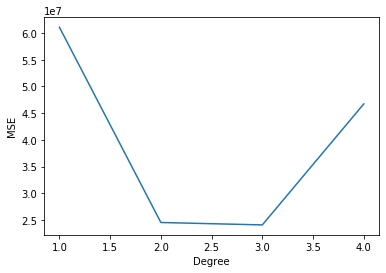

In [51]:
plt.plot(range(1, 5),loss)
plt.xlabel('Degree')
plt.ylabel('MSE')

In [52]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\mayan\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [53]:
loss.index(min(loss))

2

Indexing for list starts from 0, minimum loss is at index 2 of the list so it is 3 degree polynomial regression

In [54]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
X_test_poly = poly_reg.fit_transform(X_test)
y_pred = pol_reg.predict(X_test_poly)

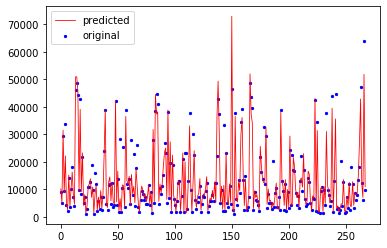

In [55]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, 10**y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [56]:

olsmod = sm.OLS(y_train, X_poly)
olsres = olsmod.fit()
    
y_pred = olsres.predict(X_test_poly)

print('RMSE = ',np.sqrt(mean_squared_error(10**y_pred,y_test)))
    
print('ADj r*2 = ',olsres.rsquared_adj)
    

RMSE =  4906.469428779574
ADj r*2 =  0.8320378906835684


In [57]:
olsres.summary()

C:\Users\mayan\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\mayan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\mayan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\mayan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     53.96
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        16:26:02   Log-Likelihood:                 480.68
No. Observations:                1070   AIC:                            -759.4
Df Residuals:                     969   BIC:                            -256.8
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5121      0.093      5.531      0.000       0.330       0.694
x1             0.0051      0.005      1.099      0.272      -0.004       0.014
x2            -0.0036      0.012     -0.292      0.770      -0.027       0.020
x3             0.0770      0.036      2.116      0.035       0.006       0.148
x4             0.2874      0.054      5.359      0.000       0.182       0.393
x5             0.2248      0.053      4.248      0.000       0.121       0.329
x6             0.2316      0.052      4.468      0.000       0.130       0.333
x7             0.2805      0.065      4.343      0.000       0.154       0.407
x8             0.1453      0.041      3.547      0.000       0.065       0.226
x9             0.1625      0.049      3.310      0.001       0.066       0.259
x10            0.1436      0.060      2.401      0.017       0.026       0.261
x11            0.0607      0.043      1.410      0.159      -0.024       0.145
x12         9.725e-06      0.000      0.063      0.949      -0.000       0.000
x13        -8.081e-05      0.000     -0.267      0.790      -0.001       0.001
x14           -0.0051      0.001     -3.786      0.000      -0.008      -0.002
x15           -0.0007      0.003     -0.255      0.799      -0.006       0.005
x16            0.0058      0.003      2.301      0.022       0.001       0.011
x17            0.0069      0.003      2.602      0.009       0.002       0.012
x18           -0.0018      0.003     -0.614      0.539      -0.007       0.004
x19            0.0008      0.002      0.408      0.684      -0.003       0.005
x20           -0.0007      0.002     -0.318      0.750      -0.005       0.004
x21            0.0011      0.002      0.470      0.639      -0.003       0.006
x22            0.0039      0.002      1.779      0.076      -0.000       0.008
x23            0.0006      0.001      0.916      0.360      -0.001       0.002
x24            0.0005      0.003      0.157      0.875      -0.006       0.007
x25           -0.0011      0.007     -0.155      0.877      -0.014       0.012
x26           -0.0025      0.007     -0.373      0.709      -0.016       0.011
x27           -0.0118      0.007     -1.745      0.081      -0.025       0.001
x28            0.0082      0.008      1.089      0.277      -0.007       0.023
x29           -0.0024      0.005     -0.479      0.632      -0.012       0.007
x30           -0.0034      0.006     -0.569      0.569      -0.015       0.008
x31           -0.0023      0.007     -0.311      0.756      -0.017       0.012
x32            0.0045      0.006      0.804      0.422      -0.006       0.015
x33           -0.0199      0.012     -1.620      0.106      -0.044       0.004
x34            0.0412      0.021      1.928      0.054      -0.001       0.083
x35            0.0358      0.021      1.719      0.086      -0.005       0.077
x3

(array([  6.,   6.,   7.,  17., 204.,  24.,   2.,   1.,   0.,   1.]),
 array([-21949.74519887, -17128.85056952, -12307.95594017,  -7487.06131081,
         -2666.16668146,   2154.72794789,   6975.62257725,  11796.5172066 ,
         16617.41183595,  21438.30646531,  26259.20109466]),
 <a list of 10 Patch objects>)

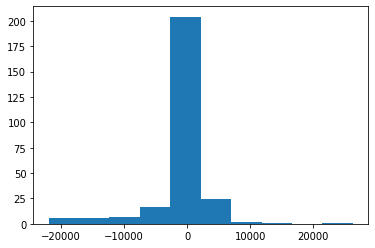

In [58]:
plt.hist(10**y_pred - y_test)